In [1]:
import numpy as np
import pandas as pd
% matplotlib inline

In [2]:
N = 1000
p = 0.02

In [3]:
num_observed = np.random.binomial(N, p)
p_hat = num_observed * 1.0 / N
print(p_hat)

0.023


### bootstrap confidence interval

Here's a 95% bootstrap confidence interval obtained by resampling 10,000 points 100,000 times from the sample distribution.

In [4]:
def bootstrap_confidence_interval(p_hat, N):
    samples = pd.Series(np.random.binomial(10000, p_hat, 100000) / 10000)
    return np.percentile(samples, 5), np.percentile(samples, 95)

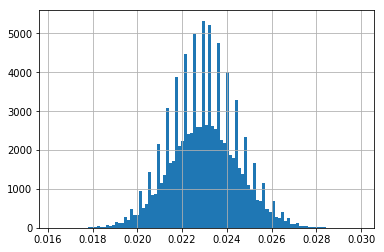

In [5]:
# we can draw a histogram!
pd.Series(np.random.binomial(10000, p_hat, 100000) / 10000).hist(bins=101)

In [6]:
bootstrap_confidence_interval(p_hat, N)

(0.0206, 0.025499999999999998)

### normal confidence interval

Here's a 95% confidence interval based on the central limit theorem (from [Wikipedia](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_approximation_interval)):

$$\hat{p} \pm z \sqrt{\frac{\hat{p}(1-\hat{p}}{n}}$$

This seems to be wider and much more likely to contain the correct probability

In [7]:
def normal_confidence_interval(p_hat, n):
    z = 1.96 # constant for the 95th percentile confidence interval
    delta = z * np.sqrt(p_hat * (1-p_hat) / n)
    return (p_hat - delta, p_hat + delta)

In [8]:
normal_confidence_interval(p_hat, N)

(0.013708897073005811, 0.032291102926994192)

### wilson score interval

Here's another one from the same [wikipedia page](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Wilson_score_interval)

$$  \frac{\hat p+\frac{z^2}{2n}}{1+\frac{z^2}{n}}
\pm
\frac{z}{1+\frac{z^2}{n}}\sqrt{\frac{\hat p(1-\hat p)}{n}+\frac{z^2}{4n^2}}
$$

In [9]:
def wilson_score_interval(p_hat, n):
    z = 1.96
    center = (p_hat + z**2 / (2*n)) / (1 + z**2 / n)
    delta = (z / (1 + z**2 / n)) * np.sqrt(p_hat * (1-p_hat)/n + z**2 / (4*n**2))
    return (center - delta, center + delta)

In [10]:
wilson_score_interval(p_hat, N)

(0.015374164302931469, 0.034276696948485098)

# how likely is each confidence interval to contain the real p?

we'd expect the answer to be about 95%. Is it? Let's see!

In [11]:
def contains_p(interval, p):
    return interval[0] <= p and interval[1] >= p

In [12]:
bootstrap_successes = 0
wilson_successes = 0
normal_successes = 0

repeats = 1000

for i in range(1, repeats):
    p_hat = np.random.binomial(N, p) * 1.0 / N
    if contains_p(bootstrap_confidence_interval(p_hat, N), p):
        bootstrap_successes += 1
    if contains_p(wilson_score_interval(p_hat, N), p):
        wilson_successes += 1
    if contains_p(normal_confidence_interval(p_hat, N), p):
        normal_successes += 1


In [13]:
print("Bootstrap success ratio:", bootstrap_successes / repeats)
print("Wilson success ratio:", wilson_successes / repeats)
print("Normal success ratio:", normal_successes / repeats)

Bootstrap success ratio: 0.403
Wilson success ratio: 0.947
Normal success ratio: 0.947


So it seems like what we've learned is that the wilson and normal confidence intervals are both pretty good and the bootstrap confidence interval is SUPER BAD. It only contains the actual probability about 40% of the time! that's really upsetting!